In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load your dataset
df = pd.read_csv('startups_data_cleaned_step1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12306 entries, 0 to 12305
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  12306 non-null  object 
 1   market                12306 non-null  object 
 2   funding_total_usd     12306 non-null  float64
 3   country_code          12306 non-null  object 
 4   state_code            12301 non-null  object 
 5   region                12306 non-null  object 
 6   city                  12291 non-null  object 
 7   funding_rounds        12306 non-null  int64  
 8   founded_at            12306 non-null  object 
 9   founded_month         12306 non-null  int64  
 10  founded_quarter       12306 non-null  int64  
 11  founded_year          12306 non-null  int64  
 12  first_funding_at      12306 non-null  object 
 13  last_funding_at       12306 non-null  object 
 14  seed                  12306 non-null  int64  
 15  venture            

In [5]:
#Data Preprocessing

In [7]:
# Create copy of dataframe
df_processed = df.copy()

# Convert date columns to datetime
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at']
for col in date_columns:
    df_processed[col] = pd.to_datetime(df_processed[col])

In [9]:
# Create temporal features
df_processed['days_to_first_funding'] = (df_processed['first_funding_at'] - df_processed['founded_at']).dt.days
df_processed['funding_duration'] = (df_processed['last_funding_at'] - df_processed['first_funding_at']).dt.days
df_processed['company_age'] = (pd.Timestamp('2024-01-01') - df_processed['founded_at']).dt.days

In [11]:
# Fill NaN values
df_processed['days_to_first_funding'] = df_processed['days_to_first_funding'].fillna(-1)
df_processed['funding_duration'] = df_processed['funding_duration'].fillna(0)
df_processed['company_age'] = df_processed['company_age'].fillna(-1)

In [13]:
# Now check for negative values in 'days_to_first_funding'
negative_days_to_funding = df_processed[df_processed['days_to_first_funding'] < 0]

In [15]:
negative_days_to_funding.loc[:,['founded_at','first_funding_at','days_to_first_funding']]

,founded_at,first_funding_at,days_to_first_funding
6,2014-10-10,2014-10-07,-3
7,2014-10-01,2014-09-14,-17
12,2014-09-18,2014-09-14,-4
23,2014-09-01,2013-08-06,-391
24,2014-09-01,2013-01-16,-593
...,...,...,...
12253,1999-01-01,1996-12-31,-731
12275,1998-11-28,1998-01-01,-331
12280,1998-01-01,1997-09-30,-93
12299,1996-01-01,1995-01-01,-365


In [17]:
# Drop rows where 'days_to_first_funding' is negative
df_processed = df_processed[df_processed['days_to_first_funding'] >= 0]

In [19]:
df_processed.columns

Index(['name', 'market', 'funding_total_usd', 'country_code', 'state_code',
       'region', 'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'category_count', 'clean_name', 'is_operating', 'category_updated',
       'days_to_first_funding', 'funding_duration', 'company_age'],
      dtype='object')

In [21]:
df_processed

,name,market,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,...,round_F,round_G,round_H,category_count,clean_name,is_operating,category_updated,days_to_first_funding,funding_duration,company_age
0,Le HerbÈ,Medical Marijuana Patients,100000.0,USA,WA,Seattle,Seattle,1,2014-12-01,12,...,0,0,0,3,le herbè,1,Healthcare,0,0,3318
1,Kandid,Apps,1400000.0,USA,CA,SF Bay Area,San Francisco,1,2014-11-19,11,...,0,0,0,1,kandid,1,Technology,13,0,3330
2,The Manly Man Can,Fashion,30.0,USA,MI,Detroit,Pinckney,1,2014-10-26,10,...,0,0,0,1,the manly man can,1,Fashion & Lifestyle,1,0,3354
3,MyKidsCalendar,Software,110000.0,USA,NJ,Newark,Long Valley,1,2014-10-22,10,...,0,0,0,1,mykidscalendar,1,Technology,0,0,3358
4,Peach,Fashion,500000.0,USA,CA,SF Bay Area,Berkeley,1,2014-10-19,10,...,0,0,0,3,peach,1,Fashion & Lifestyle,4,0,3361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,XO Group,Media,19600000.0,USA,NY,New York City,New York,3,1996-01-01,1,...,0,0,0,3,xo group,1,other,0,1200,10227
12301,eBay,Business Services,6700000.0,USA,CA,SF Bay Area,San Jose,1,1995-09-01,9,...,0,0,0,6,ebay,1,Business Services,639,0,10349
12302,Arkansas Children's Hospital,Biotechnology,3500000.0,USA,AR,Little Rock,Little Rock,1,2012-01-01,1,...,0,0,0,1,arkansas children's hospital,1,Healthcare,628,0,4383
12303,Northcentral Technical College,Education,6200000.0,USA,WI,WI - Other,Antigo,1,2012-01-01,1,...,0,0,0,1,northcentral technical college,1,Education,627,0,4383


In [23]:
# Selected features (reduced set)
selected_features = [
    'funding_total_usd',
    'funding_rounds',
    'days_to_first_funding',
    'funding_duration',
    'category_count',
    'company_age'
]

In [25]:
# Encode categorical variables (reduced set)
categorical_features = ['category_updated', 'state_code']

In [27]:
# One-Hot Encoding with pandas
df_processed = pd.get_dummies(df_processed, columns=categorical_features, drop_first=False)

# Identify dummy columns
dummy_columns = [col for col in df_processed.columns if any(prefix in col for prefix in categorical_features)]

# Update feature_columns
feature_columns = selected_features + dummy_columns

In [29]:
# Create feature matrix
X = df_processed[feature_columns]
y = df_processed['is_operating']

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11386 entries, 0 to 12304
Data columns (total 68 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   funding_total_usd                        11386 non-null  float64
 1   funding_rounds                           11386 non-null  int64  
 2   days_to_first_funding                    11386 non-null  int64  
 3   funding_duration                         11386 non-null  int64  
 4   category_count                           11386 non-null  int64  
 5   company_age                              11386 non-null  int64  
 6   category_updated_Business Services       11386 non-null  bool   
 7   category_updated_Education               11386 non-null  bool   
 8   category_updated_Energy & Environment    11386 non-null  bool   
 9   category_updated_Fashion & Lifestyle     11386 non-null  bool   
 10  category_updated_Finance                 11386 non-

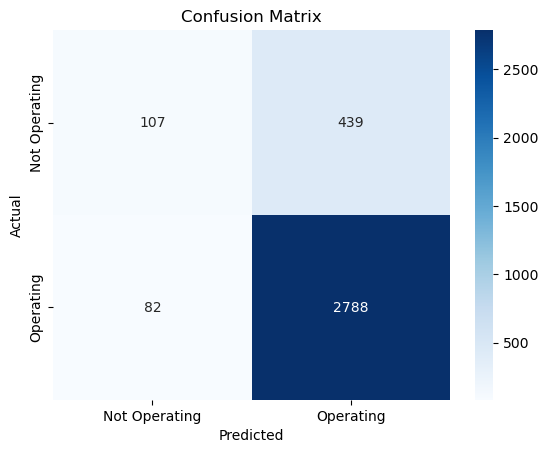

Accuracy: 0.8475
Precision: 0.8640
True Positive Rate (TPR/Recall): 0.9714
False Positive Rate (FPR): 0.8040
F1 Score: 0.9145
ROC-AUC Score: 0.8050


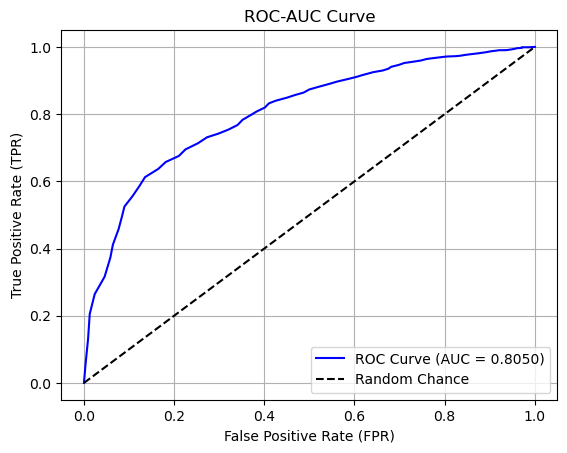

In [33]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming feature_columns and 'is_operating' are already defined
# Create feature matrix (X) and target vector (y)
#X = df_processed[feature_columns]
#y = df_processed['is_operating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Operating", "Operating"], yticklabels=["Not Operating", "Operating"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Metrics Calculation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # This is the True Positive Rate (TPR)
f1 = f1_score(y_test, y_pred)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])  # False Positive Rate (FPR)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"True Positive Rate (TPR/Recall): {recall:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC-AUC Curve
fpr_values, tpr_values, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr_values, tpr_values, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Chance")
plt.title("ROC-AUC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


[[ 107  439]
 [  80 2790]]
Accuracy: 0.8481
Precision: 0.8640
True Positive Rate (TPR/Recall): 0.9721
False Positive Rate (FPR): 0.8040
F1 Score: 0.9149
ROC-AUC Score: 0.8041


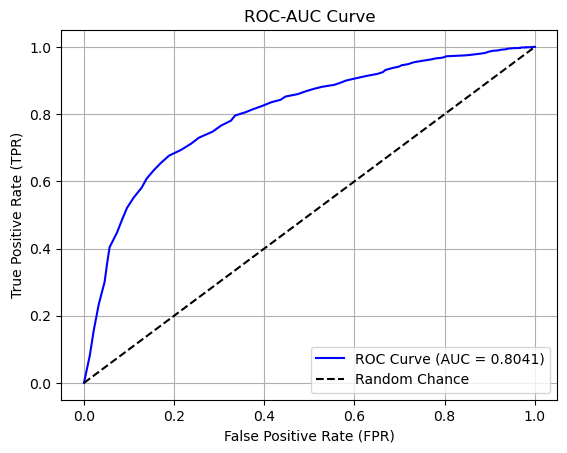

In [37]:
# Initialize Random Forest model
model = RandomForestClassifier(class_weight='balanced',random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
#sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Operating", "Operating"], yticklabels=["Not Operating", "Operating"])
#plt.title("Confusion Matrix")
#plt.xlabel("Predicted")
#plt.ylabel("Actual")
#plt.show()

# Metrics Calculation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # This is the True Positive Rate (TPR)
f1 = f1_score(y_test, y_pred)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])  # False Positive Rate (FPR)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"True Positive Rate (TPR/Recall): {recall:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC-AUC Curve
fpr_values, tpr_values, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr_values, tpr_values, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Chance")
plt.title("ROC-AUC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [39]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Check the balance
print("Original class distribution:", y_train.value_counts())
print("Resampled class distribution:", y_train_sm.value_counts())

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_sm, y_train_sm)

# Predict
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]

# Evaluation
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("Classification Report:\n", classification_report(y_test, y_pred))
#print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
#sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Operating", "Operating"], yticklabels=["Not Operating", "Operating"])
#plt.title("Confusion Matrix")
#plt.xlabel("Predicted")
#plt.ylabel("Actual")
#plt.show()

# Metrics Calculation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # This is the True Positive Rate (TPR)
f1 = f1_score(y_test, y_pred)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])  # False Positive Rate (FPR)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"True Positive Rate (TPR/Recall): {recall:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Original class distribution: is_operating
1    6695
0    1275
Name: count, dtype: int64
Resampled class distribution: is_operating
1    6695
0    6695
Name: count, dtype: int64
[[ 194  352]
 [ 215 2655]]
Accuracy: 0.8340
Precision: 0.8829
True Positive Rate (TPR/Recall): 0.9251
False Positive Rate (FPR): 0.6447
F1 Score: 0.9035
ROC-AUC Score: 0.8007


In [43]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_train_us, y_train_us = rus.fit_resample(X_train, y_train)

# Check the balance
print("Original class distribution:", y_train.value_counts())
print("Resampled class distribution:", y_train_us.value_counts())

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_us, y_train_us)

# Predict
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]

# Evaluation
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("Classification Report:\n", classification_report(y_test, y_pred))
#print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
#sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Operating", "Operating"], yticklabels=["Not Operating", "Operating"])
#plt.title("Confusion Matrix")
#plt.xlabel("Predicted")
#plt.ylabel("Actual")
#plt.show()

# Metrics Calculation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # This is the True Positive Rate (TPR)
f1 = f1_score(y_test, y_pred)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])  # False Positive Rate (FPR)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"True Positive Rate (TPR/Recall): {recall:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Original class distribution: is_operating
1    6695
0    1275
Name: count, dtype: int64
Resampled class distribution: is_operating
0    1275
1    1275
Name: count, dtype: int64
[[ 431  115]
 [ 889 1981]]
Accuracy: 0.7061
Precision: 0.9451
True Positive Rate (TPR/Recall): 0.6902
False Positive Rate (FPR): 0.2106
F1 Score: 0.7978
ROC-AUC Score: 0.8015


In [47]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create feature matrix and target variable
X = df_processed[feature_columns]
y = df_processed['is_operating']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define SMOTE and Random Under-sampler
smote = SMOTE(sampling_strategy='auto', random_state=42)
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Combine SMOTE and undersampling into a pipeline
pipeline = Pipeline(steps=[('smote', smote), 
                           ('undersample', undersample), 
                           ('classifier', RandomForestClassifier(random_state=42))])

# Fit the model
pipeline.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test_scaled)

# Evaluation Metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = (conf_matrix[0,0] + conf_matrix[1,1]) / conf_matrix.sum()
precision = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[0,1])
recall = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[1,0])
fpr = conf_matrix[0,1] / (conf_matrix[0,1] + conf_matrix[0,0])
f1 = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test_scaled)[:,1])

# Print the evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"True Positive Rate (Recall): {recall:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Optionally, also print the classification report for detailed performance
#print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 155  209]
 [ 227 1687]]
Accuracy: 0.8086
Precision: 0.8898
True Positive Rate (Recall): 0.8814
False Positive Rate (FPR): 0.5742
F1 Score: 0.8856
ROC-AUC Score: 0.8098


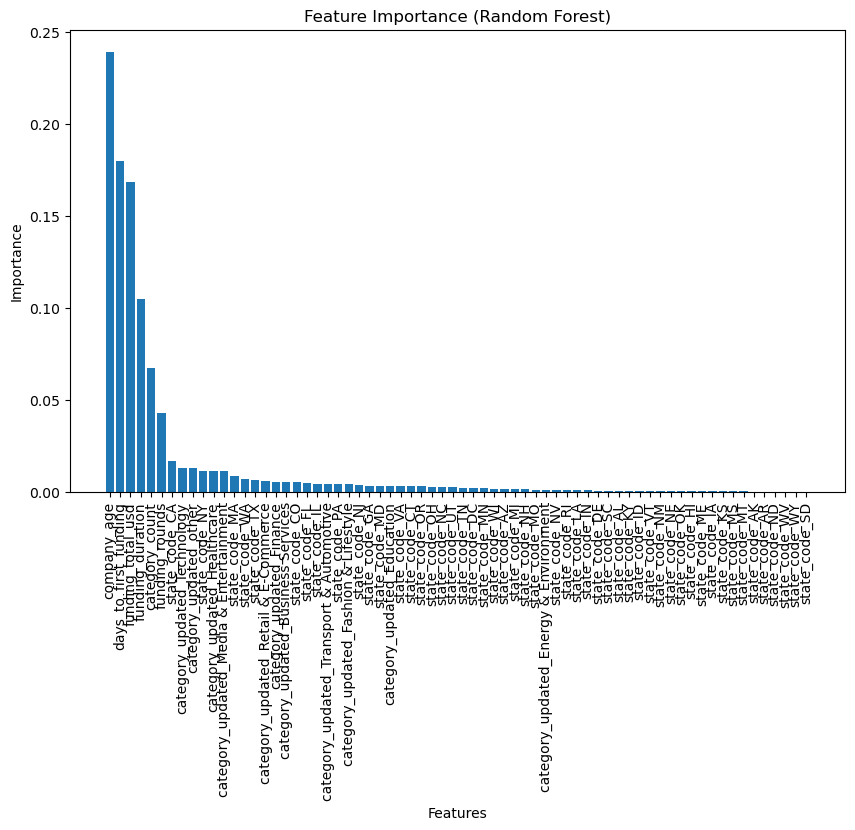

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Fit the Random Forest model (using the previous pipeline or model)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Get feature importance
importances = rf_model.feature_importances_

# Create a list of feature names (the same order as in your feature matrix)
features = X.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature importances
#print("Feature Importance:")
#for i in range(X_train_scaled.shape[1]):
    #print(f"{features[indices[i]]}: {importances[indices[i]]:.4f}")

# Plot the feature importances as a vertical bar chart (point graph)
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), features[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [53]:
# Number of top features you want to select
top_n = 10

# Get the indices of the top N important features
top_n_indices = np.argsort(importances)[::-1][:top_n]

# Get the feature names corresponding to the top N indices
selected_features_top_n = features[top_n_indices]

# Select the top N features from the original feature matrix X
X_selected_top_n = X[selected_features_top_n]

# Print selected top N features
print("Top N Selected Features:")
print(selected_features_top_n)


Top N Selected Features:
Index(['company_age', 'days_to_first_funding', 'funding_total_usd',
       'funding_duration', 'category_count', 'funding_rounds', 'state_code_CA',
       'category_updated_Technology', 'category_updated_other',
       'state_code_NY'],
      dtype='object')


In [57]:
# Set a threshold value for feature importance
threshold = 0.05  # Select features with importance greater than this threshold

# Get the indices of features whose importance exceeds the threshold
selected_features_threshold = features[importances > threshold]

# Select the features from the original feature matrix X
X_selected_threshold = X[selected_features_threshold]

# Print selected features based on the threshold
print("Selected Features Based on Threshold:")
print(selected_features_threshold)

Selected Features Based on Threshold:
Index(['funding_total_usd', 'days_to_first_funding', 'funding_duration',
       'category_count', 'company_age'],
      dtype='object')


In [110]:
# Assume that X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline for SMOTE and undersampling
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Oversampling the minority class (adjust ratio as needed)
undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)  # Undersampling the majority class
pipeline = Pipeline([('smote', smote), ('undersample', undersample)])

# Apply the resampling
X_res, y_res = pipeline.fit_resample(X_train, y_train)

# Print the class distribution after resampling
print("Resampled class distribution:", pd.Series(y_res).value_counts())


Resampled class distribution: is_operating
1    7638
0    3819
Name: count, dtype: int64


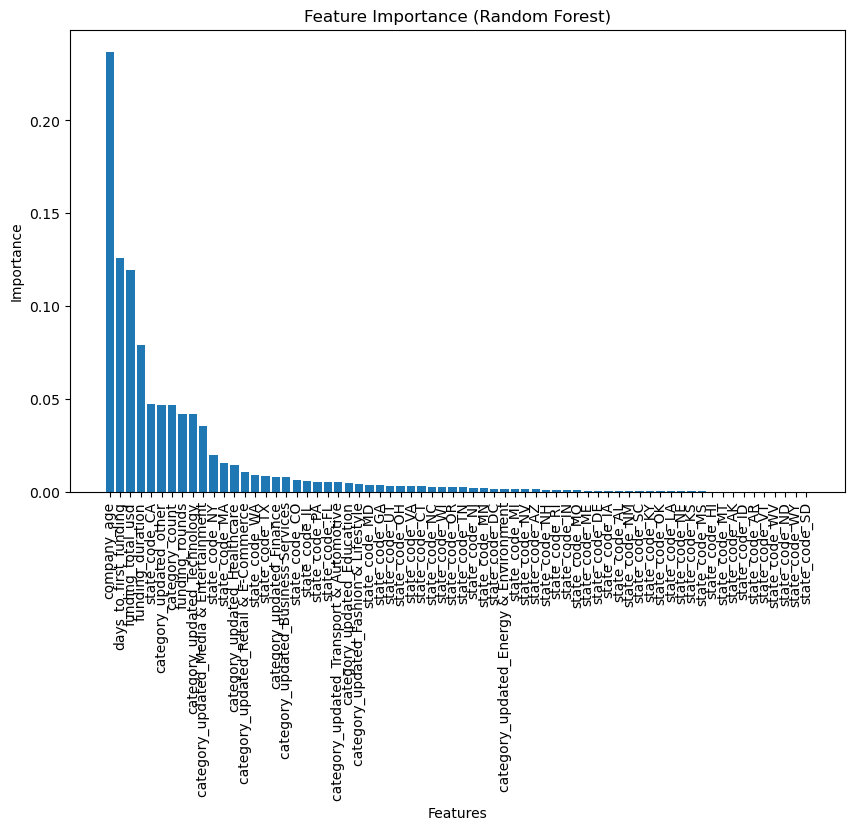

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Fit the Random Forest model (using the previous pipeline or model)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_res, y_res)

# Get feature importance
importances = rf_model.feature_importances_

# Create a list of feature names (the same order as in your feature matrix)
features = X.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature importances
#print("Feature Importance:")
#for i in range(X_train_scaled.shape[1]):
    #print(f"{features[indices[i]]}: {importances[indices[i]]:.4f}")

# Plot the feature importances as a vertical bar chart (point graph)
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), features[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [114]:
# Number of top features you want to select
top_n = 10

# Get the indices of the top N important features
top_n_indices = np.argsort(importances)[::-1][:top_n]

# Get the feature names corresponding to the top N indices
selected_features_top_n = features[top_n_indices]

# Select the top N features from the original feature matrix X
#X_selected_top_n = X[selected_features_top_n]

# Print selected top N features
print("Top N Selected Features:")
print(selected_features_top_n)

Top N Selected Features:
Index(['company_age', 'days_to_first_funding', 'funding_total_usd',
       'funding_duration', 'state_code_CA', 'category_updated_other',
       'category_count', 'funding_rounds', 'category_updated_Technology',
       'category_updated_Media & Entertainment'],
      dtype='object')


In [116]:
# Train the model using the resampled data and selected features
X_res_selected_top_n = X_res[selected_features_top_n]
rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_res_selected_top_n, y_res)

# Make predictions on the test set (using the selected features)
X_test_selected_top_n = X_test[selected_features_top_n]
y_pred = rf_model_selected.predict(X_test_selected_top_n)

In [118]:
# Evaluation Metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = (conf_matrix[0,0] + conf_matrix[1,1]) / conf_matrix.sum()
precision = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[0,1])
recall = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[1,0])
fpr = conf_matrix[0,1] / (conf_matrix[0,1] + conf_matrix[0,0])
f1 = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"True Positive Rate (Recall): {recall:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Confusion Matrix:
 [[ 147  204]
 [ 171 1756]]
Accuracy: 0.8354
Precision: 0.8959
True Positive Rate (Recall): 0.9113
False Positive Rate (FPR): 0.5812
F1 Score: 0.9035
ROC-AUC Score: 0.6650


In [120]:
# Set a threshold value for feature importance
threshold = 0.05  # Select features with importance greater than this threshold

# Get the indices of features whose importance exceeds the threshold
selected_features_threshold = features[importances > threshold]

# Select the features from the original feature matrix X
X_selected_threshold = X[selected_features_threshold]

# Print selected features based on the threshold
print("Selected Features Based on Threshold:")
print(selected_features_threshold)

Selected Features Based on Threshold:
Index(['funding_total_usd', 'days_to_first_funding', 'funding_duration',
       'company_age'],
      dtype='object')


In [122]:
# Train the model using the resampled data and selected features
X_res_selected = X_res[selected_features_threshold]
rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_res_selected, y_res)

# Make predictions on the test set (using the selected features)
X_test_selected = X_test[selected_features_threshold]
y_pred = rf_model_selected.predict(X_test_selected)

Confusion Matrix:
 [[ 177  174]
 [ 229 1698]]
Accuracy: 0.8231
Precision: 0.9071
True Positive Rate (Recall): 0.8812
False Positive Rate (FPR): 0.4957
F1 Score: 0.8939
ROC-AUC Score: 0.6927


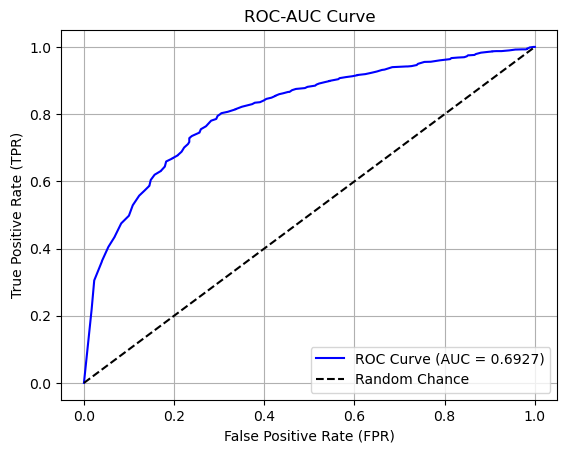

In [124]:
# Evaluation Metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = (conf_matrix[0,0] + conf_matrix[1,1]) / conf_matrix.sum()
precision = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[0,1])
recall = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[1,0])
fpr = conf_matrix[0,1] / (conf_matrix[0,1] + conf_matrix[0,0])
f1 = 2 * (precision * recall) / (precision + recall)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"True Positive Rate (Recall): {recall:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

y_pred_prob = rf_model_selected.predict_proba(X_test_selected)[:, 1]  # Probabilities for the positive class

# Plot ROC-AUC Curve
fpr_values, tpr_values, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr_values, tpr_values, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Chance")
plt.title("ROC-AUC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()